In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file="/ebio/abt6_projects/met1_somatic_transpositions/data/automatic-TSD-retrieval/TSDs.txt"

TSDs = pd.read_csv(file,delimiter="\t")


TSDs = TSDs[(TSDs['TSDlen'] != "no-TSD-possibly-no-central-config" ) & (TSDs['TSDlen'] != "not-possible-to-retrieve")] 
TSDs['TSDlen'] = pd.to_numeric(TSDs['TSDlen'], downcast='integer', errors='coerce')

TSDs

,#TEfam,TEcopy,TSDlen,readID,Chrinssite,startinssite,endinssite
1,VANDAL21,VANDAL21-Chr5:19152829,9,m64079_221220_112036/136251212/ccs,Chr1,10135363,10135363
13,ATCOPIA93_Evade,ATCOPIA93_Evade-Chr1:11941106,4,m64079_221220_112036/21432255/ccs,Chr1,5933328,5933328
14,ATCOPIA93_Evade,ATCOPIA93_Evade-Chr1:11941106,4,m64079_221220_112036/123864804/ccs,Chr1,27873875,27873875
18,VANDAL6,VANDAL6-Chr3:16344522,8,m64079_221220_112036/139002086/ccs,Chr2,22416805,22416805
21,VANDAL21,VANDAL21-Chr5:19152829,8,m64079_240212_113350/39453910/ccs,Chr3,18797334,18797334
...,...,...,...,...,...,...,...
347,PutativePackTypeCACTAMuDR,PutativePackTypeCACTAMuDR-Chr5:875414,10,m64079_240212_113350/146212441/ccs,Chr3,21247673,21247673
348,ATCOPIA93_Evade,ATCOPIA93_Evade-Chr1:11941106,7,m64079_240212_113350/138150026/ccs,Chr4,939231,939231
349,PutativePackTypeCACTAMuDR,PutativePackTypeCACTAMuDR-Chr5:875414,10,m64079_240212_113350/60359944/ccs,Chr4,17346350,17346350
350,ATCOPIA93_Evade,ATCOPIA93_Evade-Chr1:11941106,8,m64079_240212_113350/142019355/ccs,Chr5,3899694,3899694


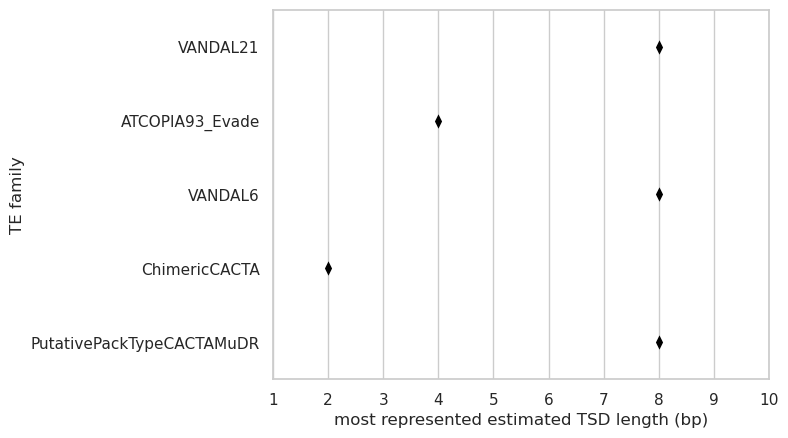

In [3]:
sns.set_theme(style="whitegrid")


f, ax = plt.subplots()

#sns.stripplot(
#    data=TSDs, x="TSDlen", y="#TEfam", #hue="species",
#     dodge=True, alpha=.1, zorder=1, legend=False,
# )


P1 = sns.pointplot(
    data=TSDs, x="TSDlen", y="#TEfam", #hue="species",
    #dodge=.8 - .8 / 3,  
    errorbar=None, 
    color='black', estimator=lambda x: x.mode()[0],
    markers="d", markersize=4, linestyle="none", 
)

P1.set(xlabel ="most represented estimated TSD length (bp)", ylabel = "TE family", )
ax.set_xlim(1, 10) 

plt.show()

f.savefig("/ebio/abt6_projects/met1_somatic_transpositions/data/Figures/pltout/estimatedTSDlens.pdf")
